In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
from scipy import interpolate
import matplotlib.cm as cm

In [2]:
sim = xr.load_dataset('../data/simulations/backtrack_loc0_column.nc')

In [3]:
sim

<xarray.Dataset>
Dimensions:     (obs: 1826, traj: 10000)
Dimensions without coordinates: obs, traj
Data variables:
    trajectory  (traj, obs) float64 0.0 0.0 0.0 ... 9.999e+03 9.999e+03
    time        (traj, obs) datetime64[ns] 2010-12-20T12:00:00 ... 2005-12-21...
    lat         (traj, obs) float64 -32.17 -32.01 -31.79 ... -32.17 -32.17
    lon         (traj, obs) float64 -6.287 -6.465 -6.588 ... -6.287 -6.287
    z           (traj, obs) float64 1.0 0.9917 0.9678 ... 5e+03 5e+03 5e+03
Attributes:
    feature_type:           trajectory
    Conventions:            CF-1.6/CF-1.7
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_version:        2.2.3.dev333+gc7504ad2
    parcels_mesh:           spherical

In [4]:
colormap='viridis_r'
x_colors = np.linspace(0, 1, 100)
colors = cm.get_cmap(colormap)(x_colors)

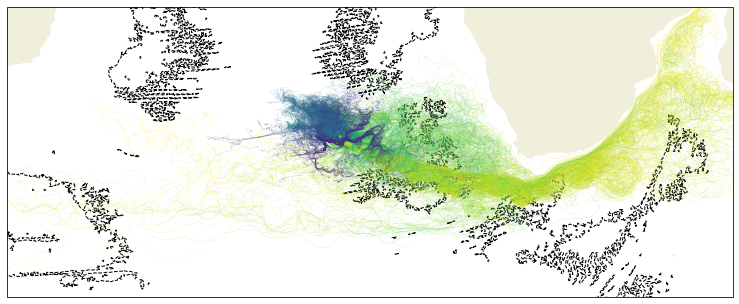

In [26]:
fig = plt.figure(figsize=(13,13))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent((-45, 45, -52, -16), crs=ccrs.PlateCarree())
# ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)

bathym = cfeature.NaturalEarthFeature(name='bathymetry_F_5000', scale='10m', category='physical')
ax.add_feature(bathym, facecolor='none', edgecolor='black', linestyle='dashed', linewidth=1)

colormap='viridis_r'
n_points = 1000
x_colors = np.linspace(0, 1, n_points)
colors = cm.get_cmap(colormap)(x_colors)

for i in range(n_points):
    
    ax.plot(sim['lon'][i*10,:], sim['lat'][i*10,:], c=colors[i],lw=0.1);
    

In [162]:
sim[]

<xarray.Dataset>
Dimensions:     (obs: 1826, traj: 10000)
Dimensions without coordinates: obs, traj
Data variables:
    trajectory  (traj, obs) float64 0.0 0.0 0.0 ... 9.999e+03 9.999e+03
    time        (traj, obs) datetime64[ns] 2010-12-20T12:00:00 ... 2005-12-21...
    lat         (traj, obs) float64 -32.17 -32.01 -31.79 ... -32.17 -32.17
    lon         (traj, obs) float64 -6.287 -6.465 -6.588 ... -6.287 -6.287
    z           (traj, obs) float64 1.0 0.9917 0.9678 ... 5e+03 5e+03 5e+03
Attributes:
    feature_type:           trajectory
    Conventions:            CF-1.6/CF-1.7
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_version:        2.2.3.dev333+gc7504ad2
    parcels_mesh:           spherical

In [33]:
5179

5179

<xarray.DataArray 'lon' ()>
array(-6.287)
Attributes:
    long_name:      
    standard_name:  longitude
    units:          degrees_east
    axis:           X


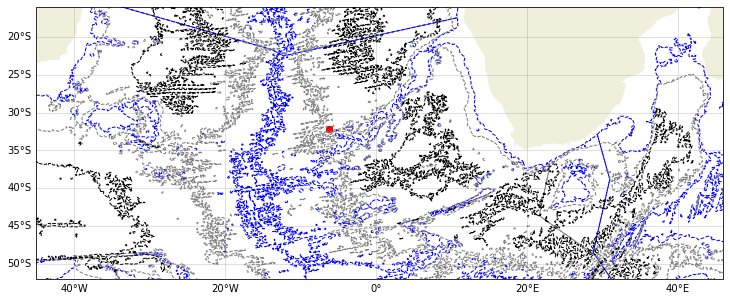

In [61]:
fig = plt.figure(figsize=(13,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent((-45, 46, -52, -16), crs=ccrs.PlateCarree())
# ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)

bathym = cfeature.NaturalEarthFeature(name='bathymetry_H_3000', scale='10m', category='physical')
ax.add_feature(bathym, facecolor='none', edgecolor='blue', linestyle='dashed', linewidth=1)

bathym = cfeature.NaturalEarthFeature(name='bathymetry_G_4000', scale='10m', category='physical')
ax.add_feature(bathym, facecolor='none', edgecolor='grey', linestyle='dashed', linewidth=1)

bathym = cfeature.NaturalEarthFeature(name='bathymetry_F_5000', scale='10m', category='physical')
ax.add_feature(bathym, facecolor='none', edgecolor='black', linestyle='dashed', linewidth=1)



gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5)
gl.right_labels = False
gl.top_labels = False


colormap='viridis_r'
n_points = 1000
x_colors = np.linspace(0, 1, n_points)
colors = cm.get_cmap(colormap)(x_colors)

age = 0
bottom = 6500

im =ax.scatter(sim['lon'][:bottom,age], sim['lat'][:bottom,age], c='red');

print(sim['lon'][0,age])

In [383]:
sim

<xarray.Dataset>
Dimensions:     (obs: 1826, traj: 10000)
Dimensions without coordinates: obs, traj
Data variables:
    trajectory  (traj, obs) float64 0.0 0.0 0.0 ... 9.999e+03 9.999e+03
    time        (traj, obs) datetime64[ns] 2010-12-20T12:00:00 ... 2005-12-21...
    lat         (traj, obs) float64 -32.17 -32.01 -31.79 ... -32.17 -32.17
    lon         (traj, obs) float64 -6.287 -6.465 -6.588 ... -6.287 -6.287
    z           (traj, obs) float64 1.0 0.9917 0.9678 ... 5e+03 5e+03 5e+03
Attributes:
    feature_type:           trajectory
    Conventions:            CF-1.6/CF-1.7
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_version:        2.2.3.dev333+gc7504ad2
    parcels_mesh:           spherical

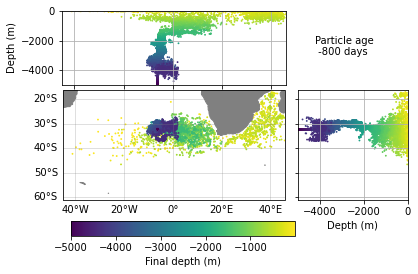

In [405]:
frame = 0
n_day = 800

fig = plt.figure()
gs = fig.add_gridspec(3, 2,  width_ratios=(6.1, 3), height_ratios=(2, 3, 1),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.07, hspace=0.07)

ax = plt.subplot(gs[1, 0], projection=ccrs.PlateCarree())
ax.set_extent((-45, 46, -52, -16))
ax.add_feature(cfeature.LAND,facecolor='#808080', zorder=1)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5)
gl.right_labels = False
gl.top_labels = False

ax_lon = plt.subplot(gs[0, 0], sharex=ax)
ax_lon.grid()
ax_lon.set_xticklabels([])
ax_lon.set_ylabel('Depth (m)')
ax_lon.set_ylim(-5000, 0)

ax_lat = plt.subplot(gs[1, 1], sharey=ax)
ax_lat.grid()
ax_lat.set_yticklabels([])
ax_lat.set_xlabel('Depth (m)')
ax_lat.set_xlim(-5000, 0)
ax_bar = plt.subplot(gs[2, 0])
ax_bar.axis('off')

ax_void = plt.subplot(gs[0, 1], sharey=ax)
ax_void.axis('off')
ax_lon.text(58,-3000, f'Particle age \n -{n_day} days')

size_point = 0.7

im = ax.scatter(sim['lon'][:,n_day], sim['lat'][:,n_day], c=-sim['z'][:,0], s=size_point)
ax_lon.scatter(sim['lon'][:,n_day], -sim['z'][:,n_day], c=-sim['z'][:,0], s=size_point)
ax_lat.scatter(-sim['z'][:,n_day], sim['lat'][:,n_day], c=-sim['z'][:,0], s=size_point)

bar_ax = fig.add_axes([0.12, 0.12, 0.52, 0.05])
plt.colorbar(im, cax=bar_ax, orientation='horizontal', label='Final depth (m)')


In [403]:
frame = 0
n_day = 800

for n_day in range(1800, 1825, 5):

    fig = plt.figure()
    gs = fig.add_gridspec(3, 2,  width_ratios=(6.1, 3), height_ratios=(2, 3, 1),
                          left=0.2, right=0.9, bottom=0.1, top=0.9,
                          wspace=0.07, hspace=0.07)

    ax = plt.subplot(gs[1, 0], projection=ccrs.PlateCarree())
    ax.set_extent((-45, 46, -52, -16))
    ax.add_feature(cfeature.LAND,facecolor='#808080')
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0.5, color='gray', alpha=0.5)
    gl.right_labels = False
    gl.top_labels = False

    ax_lon = plt.subplot(gs[0, 0], sharex=ax)
    ax_lon.grid()
    ax_lon.set_xticklabels([])
    ax_lon.set_ylabel('Depth (m)')
    ax_lon.set_ylim(-5000, 0)
    ax_lat = plt.subplot(gs[1, 1], sharey=ax)
    ax_lat.grid()
    ax_lat.set_yticklabels([])
    ax_lat.set_xlabel('Depth (m)')
    ax_lat.set_xlim(-5000, 0)
    ax_bar = plt.subplot(gs[2, 0])
    ax_bar.axis('off')

    ax_void = plt.subplot(gs[0, 1], sharey=ax)
    ax_void.axis('off')
    ax_lon.text(58,-3000, f'Particle age \n -{n_day} days')

    size_point = 0.7

    im = ax.scatter(sim['lon'][:,n_day], sim['lat'][:,n_day], c=-sim['z'][:,0], s=size_point)
    ax_lon.scatter(sim['lon'][:,n_day], -sim['z'][:,n_day], c=-sim['z'][:,0], s=size_point)
    ax_lat.scatter(-sim['z'][:,n_day], sim['lat'][:,n_day], c=-sim['z'][:,0], s=size_point)

    bar_ax = fig.add_axes([0.12, 0.12, 0.52, 0.05])
    plt.colorbar(im, cax=bar_ax, orientation='horizontal', label='Final depth (m)')


    plt.savefig(f'../figs/anim01/frame{frame:03d}', dpi=200, facecolor=(1,1,1,1))
    plt.close()
    frame += 1

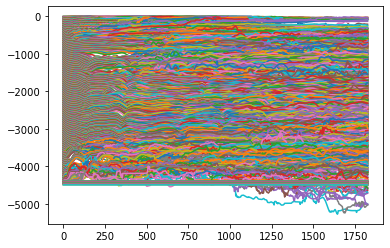

In [97]:
for i in range(900):
    plt.plot(-sim['z'][i*10,:])

Using the flow filed as it is.

Compare the initial depth versus the final depth and see how particles depth vary as time advances.

Why there are a bunch of particles stuck at -4500m? 



In [17]:
np.linspace(1,5000, 10000)

array([1.00000000e+00, 1.49994999e+00, 1.99989999e+00, ...,
       4.99900010e+03, 4.99950005e+03, 5.00000000e+03])

In [406]:
sim2 = xr.load_dataset('../data/simulations/backtrack_loc0.nc')

In [407]:
sim2

<xarray.Dataset>
Dimensions:     (obs: 366, traj: 10000)
Dimensions without coordinates: obs, traj
Data variables:
    trajectory  (traj, obs) float64 0.0 0.0 0.0 ... 9.999e+03 9.999e+03
    time        (traj, obs) datetime64[ns] 2010-12-20T12:00:00 ... 2009-12-20...
    lat         (traj, obs) float64 -32.13 -31.92 -31.66 ... -33.24 -33.21
    lon         (traj, obs) float64 -6.325 -6.551 -6.686 ... 8.814 9.173 9.452
    z           (traj, obs) float64 70.0 69.6 68.71 67.52 ... 13.77 13.77 13.54
Attributes:
    feature_type:           trajectory
    Conventions:            CF-1.6/CF-1.7
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_version:        2.2.3.dev333+gc7504ad2
    parcels_mesh:           spherical

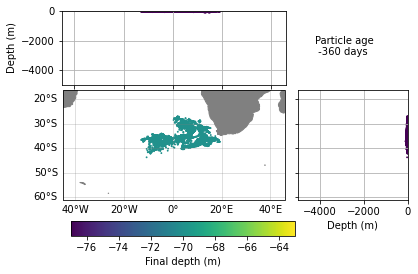

In [409]:
frame = 0
n_day = 360

fig = plt.figure()
gs = fig.add_gridspec(3, 2,  width_ratios=(6.1, 3), height_ratios=(2, 3, 1),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.07, hspace=0.07)

ax = plt.subplot(gs[1, 0], projection=ccrs.PlateCarree())
ax.set_extent((-45, 46, -52, -16))
ax.add_feature(cfeature.LAND,facecolor='#808080', zorder=1)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5)
gl.right_labels = False
gl.top_labels = False

ax_lon = plt.subplot(gs[0, 0], sharex=ax)
ax_lon.grid()
ax_lon.set_xticklabels([])
ax_lon.set_ylabel('Depth (m)')
ax_lon.set_ylim(-5000, 0)

ax_lat = plt.subplot(gs[1, 1], sharey=ax)
ax_lat.grid()
ax_lat.set_yticklabels([])
ax_lat.set_xlabel('Depth (m)')
ax_lat.set_xlim(-5000, 0)
ax_bar = plt.subplot(gs[2, 0])
ax_bar.axis('off')

ax_void = plt.subplot(gs[0, 1], sharey=ax)
ax_void.axis('off')
ax_lon.text(58,-3000, f'Particle age \n -{n_day} days')

size_point = 0.7

im = ax.scatter(sim2['lon'][:,n_day], sim2['lat'][:,n_day], c=-sim2['z'][:,0], s=size_point)
ax_lon.scatter(sim2['lon'][:,n_day], -sim2['z'][:,n_day], c=-sim2['z'][:,0], s=size_point)
ax_lat.scatter(-sim2['z'][:,n_day], sim2['lat'][:,n_day], c=-sim2['z'][:,0], s=size_point)

bar_ax = fig.add_axes([0.12, 0.12, 0.52, 0.05])
plt.colorbar(im, cax=bar_ax, orientation='horizontal', label='Final depth (m)')


In [410]:
sim3 = xr.load_dataset('../data/simulations/backtrack_loc0_5000m.nc')

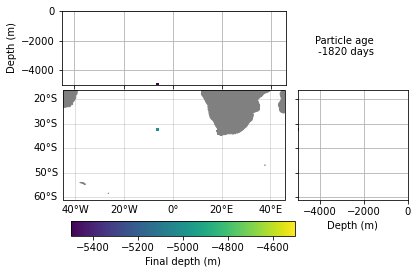

In [412]:
frame = 0
n_day = 1820

fig = plt.figure()
gs = fig.add_gridspec(3, 2,  width_ratios=(6.1, 3), height_ratios=(2, 3, 1),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.07, hspace=0.07)

ax = plt.subplot(gs[1, 0], projection=ccrs.PlateCarree())
ax.set_extent((-45, 46, -52, -16))
ax.add_feature(cfeature.LAND,facecolor='#808080', zorder=1)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5)
gl.right_labels = False
gl.top_labels = False

ax_lon = plt.subplot(gs[0, 0], sharex=ax)
ax_lon.grid()
ax_lon.set_xticklabels([])
ax_lon.set_ylabel('Depth (m)')
ax_lon.set_ylim(-5000, 0)

ax_lat = plt.subplot(gs[1, 1], sharey=ax)
ax_lat.grid()
ax_lat.set_yticklabels([])
ax_lat.set_xlabel('Depth (m)')
ax_lat.set_xlim(-5000, 0)
ax_bar = plt.subplot(gs[2, 0])
ax_bar.axis('off')

ax_void = plt.subplot(gs[0, 1], sharey=ax)
ax_void.axis('off')
ax_lon.text(58,-3000, f'Particle age \n -{n_day} days')

size_point = 0.7

im = ax.scatter(sim3['lon'][:,n_day], sim3['lat'][:,n_day], c=-sim3['z'][:,0], s=size_point)
ax_lon.scatter(sim3['lon'][:,n_day], -sim3['z'][:,n_day], c=-sim3['z'][:,0], s=size_point)
ax_lat.scatter(-sim3['z'][:,n_day], sim3['lat'][:,n_day], c=-sim3['z'][:,0], s=size_point)

bar_ax = fig.add_axes([0.12, 0.12, 0.52, 0.05])
plt.colorbar(im, cax=bar_ax, orientation='horizontal', label='Final depth (m)')


# C-grid plots

In [108]:
cufields = xr.open_dataset('../data/NEMO/ORCA0083-N06_20070818d05U.nc')
cvfields = xr.open_dataset('../data/NEMO/ORCA0083-N06_20070818d05V.nc')    

/opt/miniconda3/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/opt/miniconda3/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/opt/miniconda3/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/opt/miniconda3/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,


In [120]:
indices = {'lat': range(750, 1300), 'lon': range(2900, 4000)}

In [140]:
lons = cufields['nav_lon'][0,indices['lon']].values
lats = cufields['nav_lat'][indices['lat'],0].values

In [141]:
x,y = np.meshgrid(lons, lats)

In [131]:
cvfields['nav_lon'][0,indices['lon']]

<xarray.DataArray 'nav_lon' (x: 1100)>
array([-45.416668, -45.333332, -45.25    , ...,  46.      ,  46.083332,
        46.166668], dtype=float32)
Coordinates:
    nav_lat  (x) float32 ...
    nav_lon  (x) float32 ...
Dimensions without coordinates: x
Attributes:
    axis:           X
    standard_name:  longitude
    long_name:      Longitude
    units:          degrees_east
    nav_model:      grid_V

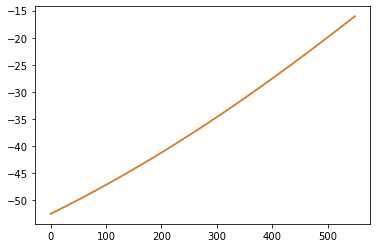

In [134]:
plt.plot(cufields['nav_lat'][indices['lat'],0])
plt.plot(cvfields['nav_lat'][indices['lat'],0])

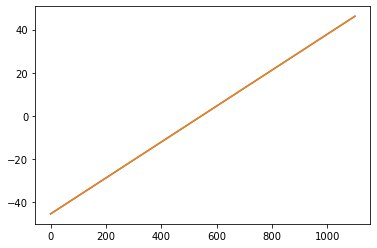

In [133]:
plt.plot(cufields['nav_lon'][0,indices['lon']])
plt.plot(cvfields['nav_lon'][0,indices['lon']])

In [55]:


xu_corners, yu_corners = np.meshgrid(np.arange(cufields['x'].values[0], cufields['x'].values[-1]+1, 1),
                np.arange(cufields['y'].values[0]-0.5, cufields['y'].values[-1]+0.5, 1))
xv_corners, yv_corners = np.meshgrid(np.arange(cvfields['x'].values[0]-0.5, cvfields['x'].values[-1]+0.5, 1),
                np.arange(cvfields['y'].values[0], cvfields['y'].values[-1]+1, 1))
cx_centers, cy_centers = np.meshgrid(np.arange(cvfields['x'].values[0]-0.5, cvfields['x'].values[-1]+1.5, 1),
                np.arange(cvfields['y'].values[0]-0.5, cvfields['y'].values[-1]+1.5, 1))
fx_corners, fy_corners = np.meshgrid(np.arange(cufields['x'].values[0]-1, cufields['x'].values[-1]+1, 1),
                np.arange(cufields['y'].values[0]-1, cufields['y'].values[-1]+1, 1))
c_cells = np.zeros((len(cufields['y']),len(cufields['x'])))



/opt/miniconda3/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/opt/miniconda3/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/opt/miniconda3/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/opt/miniconda3/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,


In [105]:
cufields['nav_lon'][0,:]

<xarray.DataArray 'nav_lon' (x: 4322)>
array([72.916664, 73.      , 73.083336, ..., 72.833336, 72.916664, 73.      ],
      dtype=float32)
Coordinates:
    nav_lat  (x) float32 -77.01 -77.01 -77.01 -77.01 ... -77.01 -77.01 -77.01
    nav_lon  (x) float32 72.92 73.0 73.08 73.17 73.25 ... 72.75 72.83 72.92 73.0
Dimensions without coordinates: x
Attributes:
    axis:           X
    standard_name:  longitude
    long_name:      Longitude
    units:          degrees_east
    nav_model:      grid_U

In [106]:
np.meshgrid(cufields['nav_lon'][:,0], cufields['nav_lat'][:,0])

[array([[72.916664, 72.916664, 72.916664, ..., 73.00011 , 73.      ,
         72.9998  ],
        [72.916664, 72.916664, 72.916664, ..., 73.00011 , 73.      ,
         72.9998  ],
        [72.916664, 72.916664, 72.916664, ..., 73.00011 , 73.      ,
         72.9998  ],
        ...,
        [72.916664, 72.916664, 72.916664, ..., 73.00011 , 73.      ,
         72.9998  ],
        [72.916664, 72.916664, 72.916664, ..., 73.00011 , 73.      ,
         72.9998  ],
        [72.916664, 72.916664, 72.916664, ..., 73.00011 , 73.      ,
         72.9998  ]], dtype=float32),
 array([[-77.010475, -77.010475, -77.010475, ..., -77.010475, -77.010475,
         -77.010475],
        [-76.99173 , -76.99173 , -76.99173 , ..., -76.99173 , -76.99173 ,
         -76.99173 ],
        [-76.97295 , -76.97295 , -76.97295 , ..., -76.97295 , -76.97295 ,
         -76.97295 ],
        ...,
        [ 49.99825 ,  49.99825 ,  49.99825 , ...,  49.99825 ,  49.99825 ,
          49.99825 ],
        [ 49.999176,  49.999176, 

In [98]:
cufields['z'].values[:,0]

KeyError: 'z'

In [95]:
cufields['nav_lon'].values[0].shape

(4322,)

In [89]:
cvfields['nav_lat'].values[:,0]

array([-77.010475, -76.99173 , -76.97295 , ...,  49.99825 ,  49.999176,
        49.996487], dtype=float32)

In [83]:
np.arange(cufields['x'].values[0], cufields['x'].values[-1]+1, 1)

array([   0,    1,    2, ..., 4319, 4320, 4321])

In [81]:
cufields['x'].values

array([   0,    1,    2, ..., 4319, 4320, 4321])

In [58]:
xu_corners[0,:].shape

(4322,)

In [59]:
yu_corners[:,0].shape

(3059,)

In [60]:
cu_zeros.shape

(75, 3059, 4322)

In [75]:
cu_zeros = np.nan_to_num(cufields['uo'][0])                                      # Velocity field with NaN -> zero to be able to use in interp2d
f = interpolate.interp2d(xu_corners[0,:],yu_corners[:,0],cu_zeros[0])                # Interpolator

cu_centers = f(cx_centers[0,:],cy_centers[:,0])                               # Velocity field interpolated on the T-points - center

cudmask = np.ma.masked_values(cu_centers,0)                      

In [76]:
cu_centers.shape

(3060, 4323)

In [68]:
fx_corners.shape

(3060, 4323)

In [69]:
fy_corners.shape

(3060, 4323)

In [71]:
cudmask.shape

(3059, 4322)

/opt/miniconda3/envs/py3_parcels/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  import sys


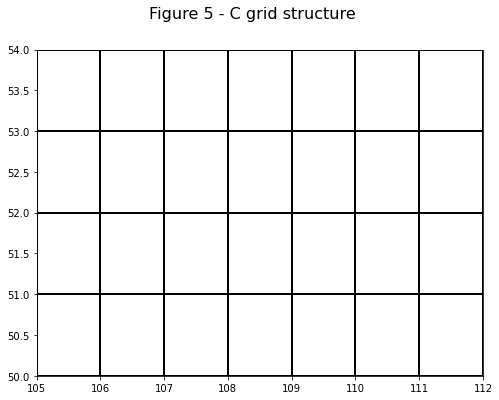

In [77]:
fig = plt.figure(figsize=(8,6))
fig.suptitle('Figure 5 - C grid structure', fontsize=16)
ax1=plt.axes()

ax1.set_xlim(105, 112)
ax1.set_ylim(50, 54)
ax1.pcolormesh(fx_corners,fy_corners,cudmask,cmap='Blues',edgecolors='k',linewidth=1)
# ax1.scatter(xu_corners,yu_corners, s=80,c=cufields['uo'][0],cmap='seismic',
#             vmin=-0.1,vmax=0.1,edgecolor='k', label = 'U')
# # ax1.scatter(xv_corners,yv_corners, s=80,c=cvfields['vo'][0],cmap='PRGn',
#             vmin=-0.1,vmax=0.1,edgecolor='k', label = 'V')
# ax1.scatter(cx_centers,cy_centers, s=80,c='orange',edgecolor='k', label = 'T')
# ax1.quiver(xu_corners,yu_corners,cufields['uo'][0],np.zeros(xu_corners.shape),
#            angles='xy', scale_units='xy', scale=0.1, width=0.007)
# ax1.quiver(xv_corners,yv_corners,np.zeros(xv_corners.shape),cvfields['vo'][0],
#            angles='xy', scale_units='xy', scale=0.3, width=0.007)

# custom_lines = [Line2D([0], [0], marker='o', color='r',lw=0),
#                 Line2D([0], [0], marker='o', color='g', lw=0),
#                 Line2D([0], [0], marker='o', color='orange', lw=0)]

# ax1.legend(custom_lines, ['U', 'V', 'T'],bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)